# Assignment 4

For Assignment 4, you are required to complete Exercise 3.13 from the book "An Introduction to Statistical Learning" (ISLP).

**Exercise 3.13** (ISLP).

In this exercise, you will create some simulated data and fit simple linear regression models to it. Ensure you use the default random number generator with the seed set to 1 before starting part (a) to ensure consistent results.

**(a)** Using the `numpy.random.normal()` method of your random number generator, create a vector, `x`, containing 100 observations drawn from an N(0, 1) distribution. This represents a feature, X.

**(b)** Using the `numpy.random.normal()` method, create a vector, $\epsilon$, containing 100 observations drawn from an N(0, 0.25) distribution—a normal distribution with a mean of zero and a variance of 0.25.

**(c)** Using $x$ and $\epsilon$, generate a vector `y` according to the model: $Y = -1 + 0.5X + \epsilon$. What is the length of the vector `y`? What are the values of $β_0$ and $β_1$ in this linear model?

**(d)** Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

**(e)** Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat{β}_0$ and $\hat{β}_1$ compare to $β_0$ and $β_1$?

**(f)** Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` method of the axes to create an appropriate legend.

**(g)** Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

**(h)** Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

**(i)** Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

**(j)** What are the confidence intervals for $β_0$ and $β_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

**Extra questions.**

**(e1)** Now create a second variable for the problem $x_2$ that is randomly generated without changing your $y$ model. How many coefficients does your linear regression model have if we use both $x_1$ and $x_2$ ? What are the values you expect for the different coefficients?

**(e2)** Fit the linear regression model. Do the values of the different coefficients agree with your answer in step **(e1)**?

**(e3)** Now we will use the bootstrapping method in order to train our model several times. To do that, you have to sample B = 10 bootstrap datasets by sampling n=100 points of the original dataset with replacement. Every time we fit the model on the different bootstrap dataset, we take a different estimation of the parameters, so you will have B different values for each coefficient. Plot the distribution of the different parameters. Find the $2.5\%$ and $97.5\%$ percentiles for each coefficient. Compare the values with the confidence interval of **e2** step. Increase the number of bootstrap samples B and repeat steps of **e3**. What do you observe?

## Solution

In [1]:
random_seed = 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1)

**(a)** Using the `numpy.random.normal()` method of your random number generator, create a vector, `x`, containing 100 observations drawn from an N(0, 1) distribution. This represents a feature, X.

In [4]:
# generate sample from normal distribution N(0, 1)
x = np.random.normal(
                     loc= 0, # mean = 0
                     scale = 1 , # std = 1
                     size = 100 # number of examples
                    )

**(b)** Using the `numpy.random.normal()` method, create a vector, $\epsilon$, containing 100 observations drawn from an N(0, 0.25) distribution—a normal distribution with a mean of zero and a variance of 0.25.

In [5]:
eps = np.random.normal(
                     loc= 0, # mean = 0
                     scale = 0.25 , # std = 1
                     size = 100 # number of examples
                    )

In [6]:
eps

array([-0.11178214,  0.30612693,  0.10087291,  0.14839463, -0.27372796,
        0.04234561,  0.18513911, -0.23842515, -0.06655463,  0.00815364,
       -0.34327933,  0.07878985,  0.21154016, -0.21487899,  0.08763649,
       -0.32807085, -0.00967388, -0.40394309,  0.28035443,  0.10222513,
       -0.00615424, -0.1937904 ,  0.31843898,  0.49177544, -0.46449547,
        0.30904101,  0.40691269,  0.08450292, -0.29981701,  0.21583633,
       -0.04523008, -0.15098016, -0.30751453,  0.13763437,  0.19820172,
       -0.15588268,  0.13014408, -0.28608535,  0.20046526,  0.01164182,
       -0.04664244, -0.02543647,  0.21722154,  0.18760291,  0.13236633,
        0.0344253 ,  0.01945528,  0.15459507,  0.05812364,  0.17063785,
       -0.07752919, -0.60870944,  0.25970615,  0.54674491,  0.11034111,
       -0.02503881, -0.03411119, -0.02976355,  0.00435235, -0.28050468,
       -0.12927361, -0.24925671,  0.06219979, -0.07416029,  0.12380283,
       -0.04367579,  0.2465838 ,  0.05338348,  0.54767493, -0.47

**(c)** Using $x$ and $\epsilon$, generate a vector `y` according to the model: $Y = -1 + 0.5X + \epsilon$. What is the length of the vector `y`? What are the values of $β_0$ and $β_1$ in this linear model?

In [7]:
y = 0.5 * x - 1 + eps

The leanght of vector y is 100, equal to number of examples of the problem.  
The values for the coefficients are $\beta_0 = -1$ and $\beta_1 = 1/2$

**(d)** Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

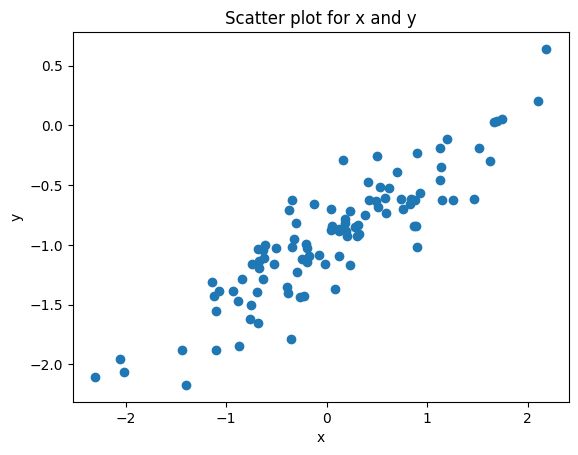

In [8]:
plt.figure()
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot for x and y")
plt.show()
plt.close()

The relation between x and y variable is quite linear, with some noise due to the $\epsilon$ parameter

**(e)** Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat{β}_0$ and $\hat{β}_1$ compare to $β_0$ and $β_1$?

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression(fit_intercept=True)
reg.fit(x.reshape(-1,1), y.reshape(-1,1))

LinearRegression()

In [11]:
reg.coef_

array([[0.52385678]])

In [12]:
reg.intercept_

array([-0.96324662])

The values are very close to orginal values of the problem

In [13]:
!pip install statsmodels

You should consider upgrading via the '/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/envs/bayesian-fairness/bin/python3.9 -m pip install --upgrade pip' command.


In [14]:
import statsmodels.api as sm

In [15]:
x_const = np.concatenate([np.ones(100).reshape(-1,1), x.reshape(-1,1)],axis=1)
x_const

array([[ 1.        ,  1.62434536],
       [ 1.        , -0.61175641],
       [ 1.        , -0.52817175],
       [ 1.        , -1.07296862],
       [ 1.        ,  0.86540763],
       [ 1.        , -2.3015387 ],
       [ 1.        ,  1.74481176],
       [ 1.        , -0.7612069 ],
       [ 1.        ,  0.3190391 ],
       [ 1.        , -0.24937038],
       [ 1.        ,  1.46210794],
       [ 1.        , -2.06014071],
       [ 1.        , -0.3224172 ],
       [ 1.        , -0.38405435],
       [ 1.        ,  1.13376944],
       [ 1.        , -1.09989127],
       [ 1.        , -0.17242821],
       [ 1.        , -0.87785842],
       [ 1.        ,  0.04221375],
       [ 1.        ,  0.58281521],
       [ 1.        , -1.10061918],
       [ 1.        ,  1.14472371],
       [ 1.        ,  0.90159072],
       [ 1.        ,  0.50249434],
       [ 1.        ,  0.90085595],
       [ 1.        , -0.68372786],
       [ 1.        , -0.12289023],
       [ 1.        , -0.93576943],
       [ 1.        ,

In [16]:
model = sm.OLS(endog= y,exog=x_const)

In [17]:
model = model.fit()

In [18]:
model.params

array([-0.96324662,  0.52385678])

In [19]:
summary_1 = model.summary()
summary_1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           5.39e-36
Time:                        14:47:43   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9632      0.023    -40.999      0.000      -1.010      -0.917
x1             0.5239      0.026     19.783      0.000       0.471       0.576
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(f)** Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` method of the axes to create an appropriate legend.

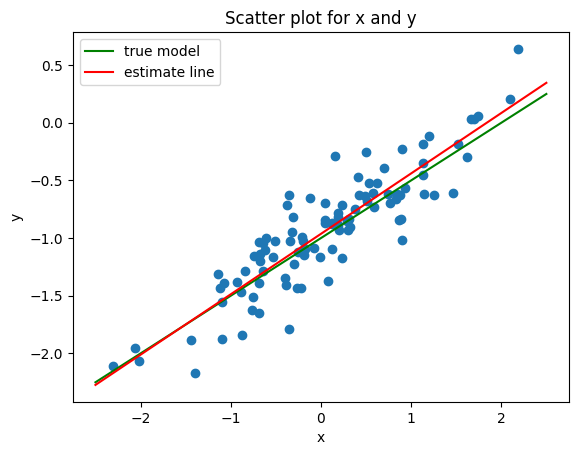

In [20]:
# produce line by get the results of the true and the estimated model on several x points
x_ = np.linspace(-2.5,2.5)
y_true = 0.5 * x_ - 1
y_estim = 0.5239* x_ -0.9632

# plot
plt.figure()
plt.scatter(x, y)
plt.plot(x_, y_true,color = "green", label = "true model")
plt.plot(x_, y_estim,color = "red", label = "estimate line")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot for x and y")
plt.show()
plt.close()

**(g)** Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [21]:
x_const_2 = np.concatenate([x_const, (x*x).reshape(-1,1)],axis=1)

In [22]:
model_2 = sm.OLS(endog= y,exog=x_const_2)
model_2 = model_2.fit()

In [23]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.32e-34
Time:                        14:47:44   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9663      0.029    -33.486      0.000      -1.024      -0.909
x1             0.5234      0.027     19.582      0.000       0.470       0.576
x2             0.0039      0.021      0.181      0.856      -0.038       0.046
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model.params

array([-0.96324662,  0.52385678])

The coefficient $\beta_2$ of $x^2$ is quite small, while the the coefficients $\beta_1$,  $\beta_0$ are quite similar as before. In other words, there is no statistically significant relationship between $x^2$
 and y - the quadratic term does not improve the model fit.

we can illustrate by doing the plots of the different models

In [25]:
model_2.params[0]

-0.9662543007102569

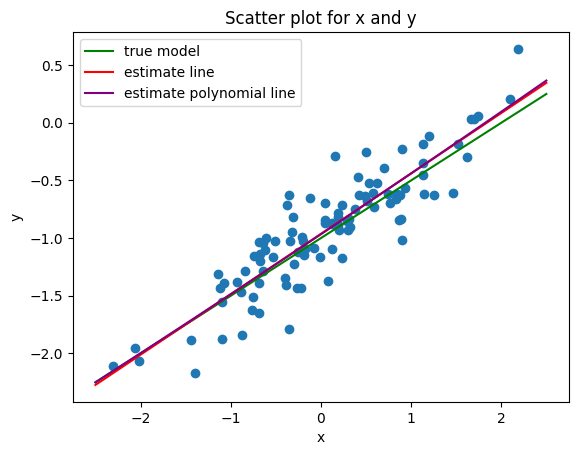

In [26]:
# produce line by get the results of the true and the estimated model on several x points
x_ = np.linspace(-2.5,2.5)
y_true = 0.5 * x_ - 1
y_estim = model.params[1] * x_ + model.params[0]
y_estim_2 = model_2.params[2] * (x_*x_) + model_2.params[1]*x_ + model_2.params[0]

# plot
plt.figure()
plt.scatter(x, y)
plt.plot(x_, y_true,color = "green", label = "true model")
plt.plot(x_, y_estim,color = "red", label = "estimate line")
plt.plot(x_, y_estim_2,color = "purple", label = "estimate polynomial line")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot for x and y")
plt.show()
plt.close()

**(h)** Repeat (a)–(e) after modifying the data generation process in such a way that there is less noise in the data. The model should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

In [27]:
x = np.random.normal(
                     loc= 0, # mean = 0
                     scale = 1 , # std = 1
                     size = 100 # number of examples
                    )
eps = np.random.normal(
                     loc= 0, # mean = 0
                     scale = 0.05 , # std = 0.05
                     size = 100 # number of examples
                    )
y = 0.5 * x - 1 + eps # the same model

In [28]:
x_const = np.concatenate([np.ones(100).reshape(-1,1), x.reshape(-1,1)],axis=1)
model = sm.OLS(endog= y,exog=x_const)
model = model.fit()
summary_2 = model.summary()
summary_2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     8662.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.97e-97
Time:                        14:47:44   Log-Likelihood:                 151.58
No. Observations:                 100   AIC:                            -299.2
Df Residuals:                      98   BIC:                            -293.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0010      0.005   -186.443      0.000      -1.012      -0.990
x1             0.4972      0.005     93.071      0.000       0.487       0.508
==============================================================================
Omnibus:                        0.426   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.121
Skew:                          -0.045   Prob(JB):                        0.941
Kurtosis:                       3.145   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

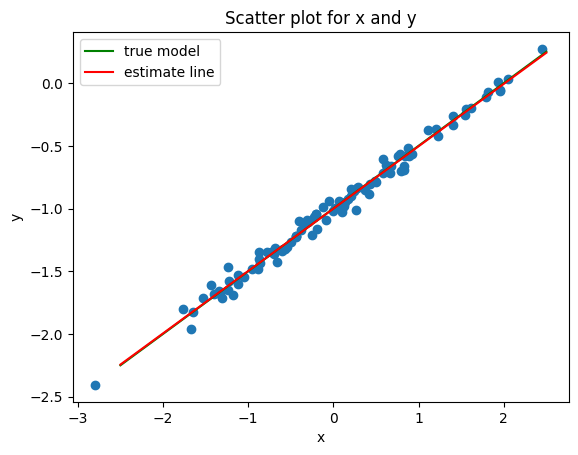

In [29]:
# produce line by get the results of the true and the estimated model on several x points
x_ = np.linspace(-2.5,2.5)
y_true = 0.5 * x_ - 1
y_estim =model.params[1]* x_  + model.params[0]

# plot
plt.figure()
plt.scatter(x, y)
plt.plot(x_, y_true,color = "green", label = "true model")
plt.plot(x_, y_estim,color = "red", label = "estimate line")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot for x and y")
plt.show()
plt.close()

We can see the coffiecinets are closer to the real values.  
So having less noise increate the accuracy of our final model.

**(i)** Repeat (a)–(e) after modifying the data generation process in such a way that there is more noise in the data. The model should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

In [30]:
x = np.random.normal(
                     loc= 0, # mean = 0
                     scale = 1 , # std = 1
                     size = 100 # number of examples
                    )
eps = np.random.normal(
                     loc= 0, # mean = 0
                     scale = 0.5 , # std = 0.05
                     size = 100 # number of examples
                    )
y = 0.5 * x - 1 + eps # the same model

In [31]:
x_const = np.concatenate([np.ones(100).reshape(-1,1), x.reshape(-1,1)],axis=1)
model = sm.OLS(endog= y,exog=x_const)
model = model.fit()
summary_3 = model.summary()

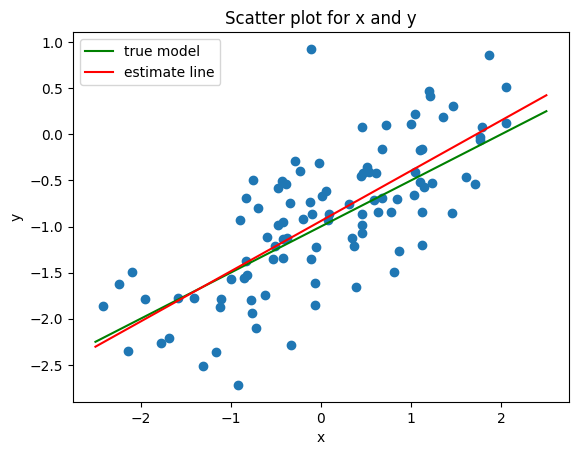

In [32]:
# produce line by get the results of the true and the estimated model on several x points
x_ = np.linspace(-2.5,2.5)
y_true = 0.5 * x_ - 1
y_estim = model.params[1]* x_ + model.params[0]

# plot
plt.figure()
plt.scatter(x, y)
plt.plot(x_, y_true,color = "green", label = "true model")
plt.plot(x_, y_estim,color = "red", label = "estimate line")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot for x and y")
plt.show()
plt.close()

We can see the coffiecinets are quite different from  to the real values.  
So is more difficult to estimate the correct cofficiane then having more noise.

**(j)** What are the confidence intervals for $β_0$ and $β_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [33]:
# noise with std = 0.05
table_no_noise = summary_2.tables[1]
table_no_noise

,coef,std err,t,P>|t|,[0.025,0.975]
const,-1.0010,0.005,-186.443,0.000,-1.012,-0.990
x1,0.4972,0.005,93.071,0.000,0.487,0.508


In [34]:
# noise with std = 0.25
table_noise = summary_1.tables[1]
table_noise

,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.9632,0.023,-40.999,0.000,-1.010,-0.917
x1,0.5239,0.026,19.783,0.000,0.471,0.576


In [35]:
# noise with std = 0.5
table_more_noise = summary_3.tables[1]
table_more_noise

,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.9401,0.053,-17.890,0.000,-1.044,-0.836
x1,0.5451,0.051,10.764,0.000,0.445,0.646


In [36]:
end = float(table_more_noise.data[1][-1].split(" ")[-1])
start = float(table_more_noise.data[1][-2].split(" ")[-1])

As expected the width of the intervals increases as the level of noise increases.  
Rember that the confidence interval in depending on the amount of noise.

**Extra questions.**

**(e1)** Now create a second variable for the problem $x_2$ that is randomly generated without changing your $y$ model. How many coefficients does your linear regression model have if we use both $x_1$ and $x_2$ ? What are the values you expect for the different coefficients?

In [37]:
x = np.random.normal(0,1,size = 100)
x2 = np.random.normal(0,1,size = 100)

eps = np.random.normal(
                     loc= 0, # mean = 0
                     scale = 0.5 , # std = 0.05
                     size = 100 # number of examples
                    )
y = 0.5 * x - 1 + eps # the same model

There are three different coefficients: b_0, b_1, and b_2, and we expect b_2 to be close to zero, while the others should be close to the original model values.

**(e2)** Fit the linear regression model. Do the values of the different coefficients agree with your answer in step **(e1)**?

In [38]:
x_const = np.concatenate([np.ones(100).reshape(-1,1), x.reshape(-1,1), x2.reshape(-1,1)],axis=1)
model = sm.OLS(endog= y, exog=x_const)
model = model.fit()
summary_4 = model.summary()
summary_4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     57.50
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           3.40e-17
Time:                        14:47:44   Log-Likelihood:                -63.791
No. Observations:                 100   AIC:                             133.6
Df Residuals:                      97   BIC:                             141.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9512      0.047    -20.337      0.000      -1.044      -0.858
x1             0.5185      0.048     10.698      0.000       0.422       0.615
x2            -0.0593      0.045     -1.308      0.194      -0.149       0.031
==============================================================================
Omnibus:                        3.231   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                3.281
Skew:                          -0.098   Prob(JB):                        0.194
Kurtosis:                       3.865   Cond. No.                         1.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see, b_0 has a relatively smaller contribution to our model.

**(e3)** Now we will use the bootstrapping method in order to train our model several times. To do that, you have to sample B bootstrap datasets by sampling n=100 points of the original dataset with replacement. Every time we fit the model, we take a different estimation of the parameters, so you will have B different values for each parameter. Plot the distribution of the different parameters. Find the $2.5\%$ and $97.5\%$ percentiles for each coefficient. Compare the values with the confidence interval of **e2** step. Increase the number of bootstrap samples B and repeat steps of **e3**. What do you observe?  
You can use B equal to 10, 100 and 1000.

In [39]:
# create bootstrap dataset
B = 1000
def get_bootstrap_percentiles(B,x,y):
    b_0_list = []
    b_1_list = []
    b_2_list = []
    for i in range(B):
        bootstrap_sample_indexies = np.random.choice(np.arange(100), size = 100, replace=True)
        bootstrap_samples_x = x[bootstrap_sample_indexies]
        bootstrap_samples_y = y[bootstrap_sample_indexies]

        model = sm.OLS(endog= bootstrap_samples_y, exog=bootstrap_samples_x)
        model = model.fit()

        b_0_list += [model.params[0]]
        b_1_list += [model.params[1]]
        b_2_list += [model.params[2]]
        
    percentile_b0_l, percentile_b0_h = np.percentile(b_0_list, [2.5, 97.5])
    percentile_b1_l, percentile_b1_h = np.percentile(b_1_list, [2.5, 97.5])
    percentile_b2_l, percentile_b2_h = np.percentile(b_2_list, [2.5, 97.5])
    
    CI = (percentile_b0_l,percentile_b0_h), (percentile_b1_l,percentile_b1_h), (percentile_b2_l,percentile_b2_h)
    
    return b_0_list, b_1_list, b_2_list, CI

In [40]:
b_0_list_B10, b_1_list_B10, b_2_list_B10, CI_B10 = get_bootstrap_percentiles(B=10, x = x_const, y=y)
(percentile_b0_l_B10,percentile_b0_h_B10),\
(percentile_b1_l_B10,percentile_b1_h_B10),\
(percentile_b2_l_B10,percentile_b2_h_B10) = CI_B10

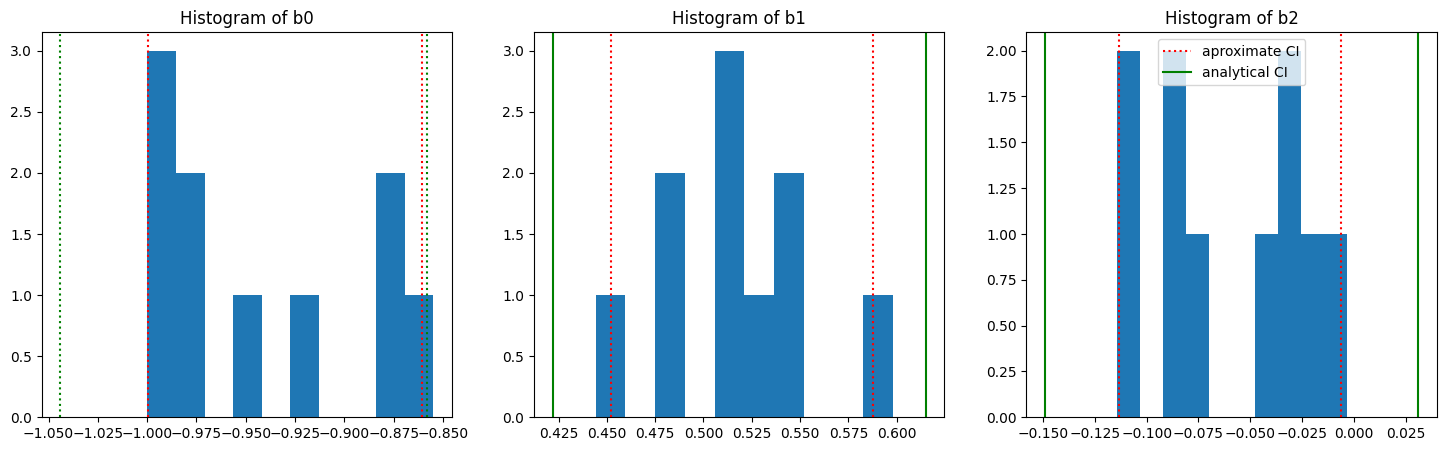

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,5))
b0_ci_0 = float(summary_4.tables[1].data[1][-2])
b0_ci_1 = float(summary_4.tables[1].data[1][-1])
ax1.hist(b_0_list_B10)
ax1.title.set_text('Histogram of b0')
ax1.axvline(x=percentile_b0_l_B10, linestyle=':', color='red', label = "aproximate CI")
ax1.axvline(x=percentile_b0_h_B10, linestyle=':', color='red', label = "aproximate CI")
ax1.axvline(x=b0_ci_0,linestyle=':', color='green')
ax1.axvline(x=b0_ci_1,linestyle=':', color='green')

b1_ci_0 = float(summary_4.tables[1].data[2][-2])
b1_ci_1 = float(summary_4.tables[1].data[2][-1])
ax2.hist(b_1_list_B10)
ax2.title.set_text('Histogram of b1')
ax2.axvline(x=percentile_b1_l_B10, linestyle=':', color='red', label = "aproximate CI")
ax2.axvline(x=percentile_b1_h_B10, linestyle=':', color='red', label = "aproximate CI")
ax2.axvline(x=b1_ci_0,  color='green')
ax2.axvline(x=b1_ci_1, color='green')

b2_ci_0 = float(summary_4.tables[1].data[3][-2])
b2_ci_1 = float(summary_4.tables[1].data[3][-1])
ax3.hist(b_2_list_B10)
ax3.title.set_text('Histogram of b2')
ax3.axvline(x=percentile_b2_l_B10, linestyle=':', color='red', label = "aproximate CI")
ax3.axvline(x=percentile_b2_h_B10, linestyle=':', color='red')
ax3.axvline(x=b2_ci_0,color='green', label = "analytical CI")
ax3.axvline(x=b2_ci_1, color='green')
plt.legend()

In [42]:
b_0_list_B100, b_1_list_B100, b_2_list_B100, CI_B100 = get_bootstrap_percentiles(B=100, x = x_const, y=y)
(percentile_b0_l_B100,percentile_b0_h_B100), \
(percentile_b1_l_B100,percentile_b1_h_B100), \
(percentile_b2_l_B100,percentile_b2_h_B100) = CI_B100

In [43]:
b_0_list_B1000, b_1_list_B1000, b_2_list_B1000, CI_B1000 = get_bootstrap_percentiles(B=1000, x = x_const, y=y)
(percentile_b0_l_B1000,percentile_b0_h_B1000), \
(percentile_b1_l_B1000,percentile_b1_h_B1000), \
(percentile_b2_l_B1000,percentile_b2_h_B1000) = CI_B1000

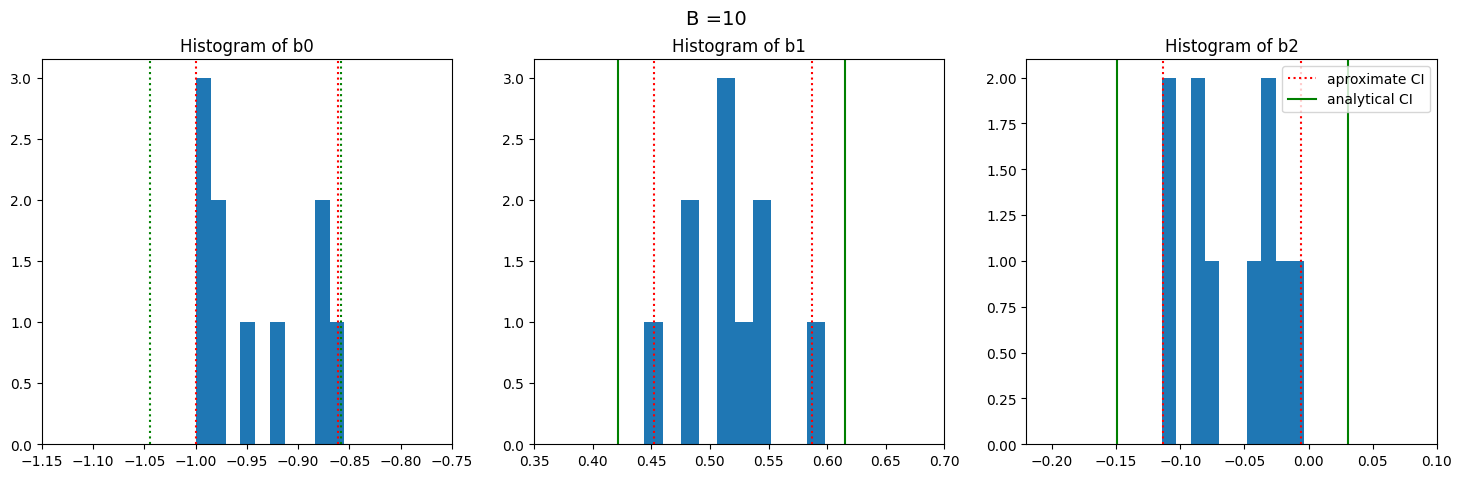

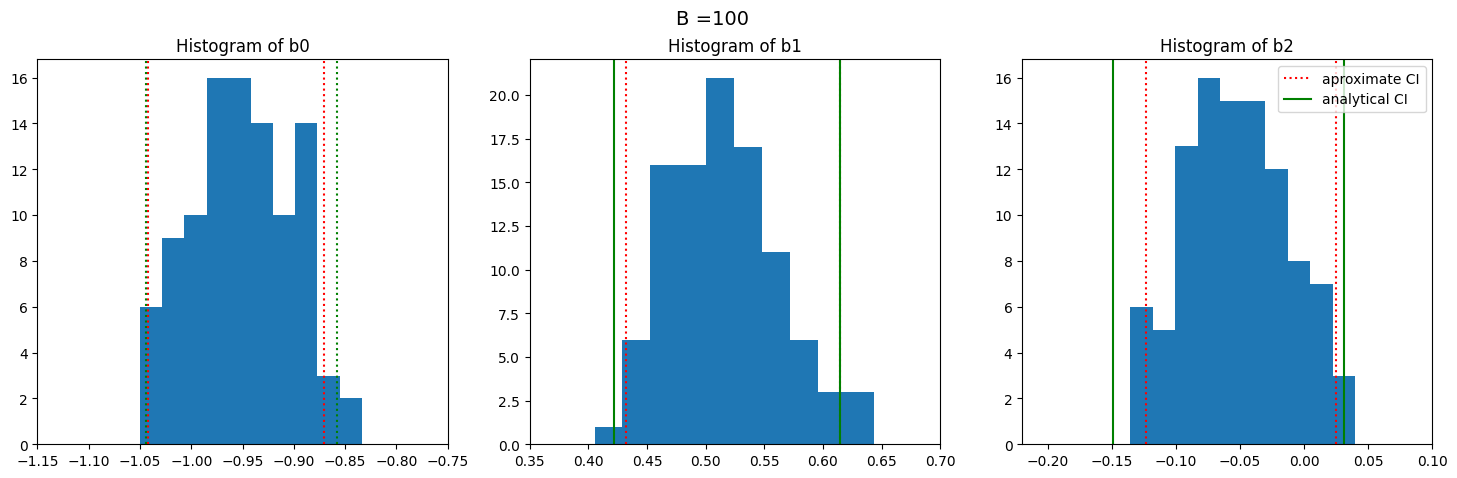

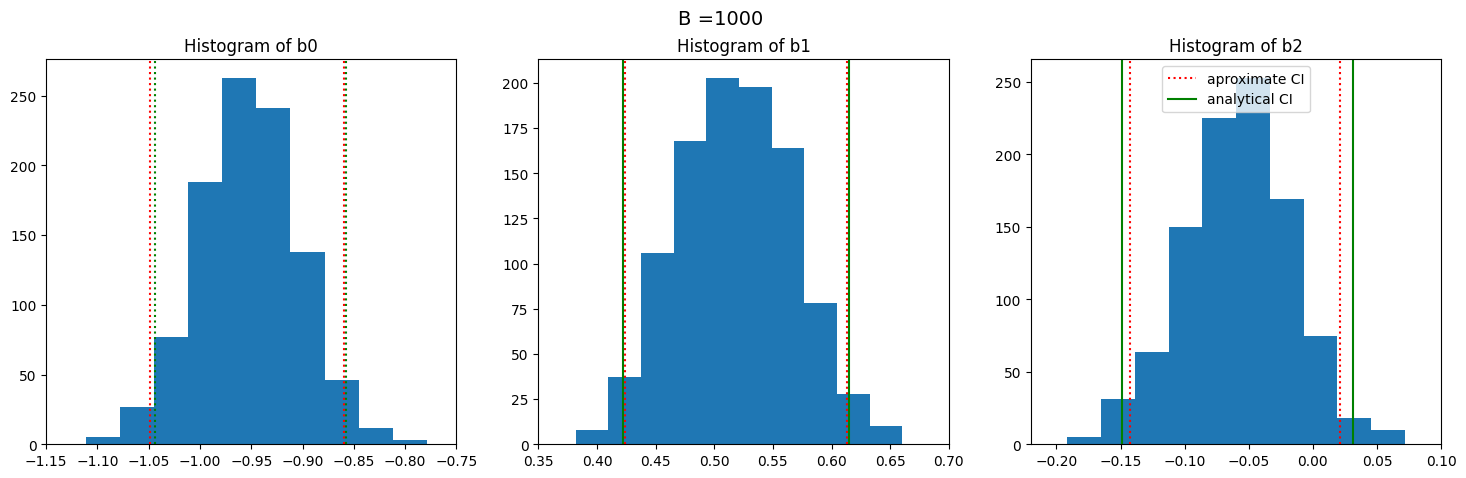

In [44]:
# is beter to create a function
b0_ci_0 = float(summary_4.tables[1].data[1][-2])
b0_ci_1 = float(summary_4.tables[1].data[1][-1])

b1_ci_0 = float(summary_4.tables[1].data[2][-2])
b1_ci_1 = float(summary_4.tables[1].data[2][-1])

b2_ci_0 = float(summary_4.tables[1].data[3][-2])
b2_ci_1 = float(summary_4.tables[1].data[3][-1])

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,5))
fig.suptitle("B =10", fontsize=14)

ax1.hist(b_0_list_B10)
ax1.title.set_text('Histogram of b0')
ax1.axvline(x=percentile_b0_l_B10, linestyle=':', color='red', label = "aproximate CI")
ax1.axvline(x=percentile_b0_h_B10, linestyle=':', color='red', label = "aproximate CI")
ax1.axvline(x=b0_ci_0,linestyle=':', color='green')
ax1.axvline(x=b0_ci_1,linestyle=':', color='green')
ax1.set_xlim(-1.15,-0.75)

ax2.hist(b_1_list_B10)
ax2.title.set_text('Histogram of b1')
ax2.axvline(x=percentile_b1_l_B10, linestyle=':', color='red', label = "aproximate CI")
ax2.axvline(x=percentile_b1_h_B10, linestyle=':', color='red', label = "aproximate CI")
ax2.axvline(x=b1_ci_0,  color='green')
ax2.axvline(x=b1_ci_1, color='green')
ax2.set_xlim(0.35,0.70)

ax3.hist(b_2_list_B10)
ax3.title.set_text('Histogram of b2')
ax3.axvline(x=percentile_b2_l_B10, linestyle=':', color='red', label = "aproximate CI")
ax3.axvline(x=percentile_b2_h_B10, linestyle=':', color='red')
ax3.axvline(x=b2_ci_0,color='green', label = "analytical CI")
ax3.axvline(x=b2_ci_1, color='green')
ax3.set_xlim(-0.22,0.1)
plt.legend()
plt.show()
plt.close()


############## B = 100 ##############
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,5))
fig.suptitle("B =100", fontsize=14)
ax1.hist(b_0_list_B100)
ax1.title.set_text('Histogram of b0')
ax1.axvline(x=percentile_b0_l_B100, linestyle=':', color='red', label = "aproximate CI")
ax1.axvline(x=percentile_b0_h_B100, linestyle=':', color='red', label = "aproximate CI")
ax1.axvline(x=b0_ci_0,linestyle=':', color='green')
ax1.axvline(x=b0_ci_1,linestyle=':', color='green')
ax1.set_xlim(-1.15,-0.75)

ax2.hist(b_1_list_B100)
ax2.title.set_text('Histogram of b1')
ax2.axvline(x=percentile_b1_l_B100, linestyle=':', color='red', label = "aproximate CI")
ax2.axvline(x=percentile_b1_h_B100, linestyle=':', color='red', label = "aproximate CI")
ax2.axvline(x=b1_ci_0,  color='green')
ax2.axvline(x=b1_ci_1, color='green')
ax2.set_xlim(0.35,0.70)

ax3.hist(b_2_list_B100)
ax3.title.set_text('Histogram of b2')
ax3.axvline(x=percentile_b2_l_B100, linestyle=':', color='red', label = "aproximate CI")
ax3.axvline(x=percentile_b2_h_B100, linestyle=':', color='red')
ax3.axvline(x=b2_ci_0,color='green', label = "analytical CI")
ax3.axvline(x=b2_ci_1, color='green')
ax3.set_xlim(-0.22,0.1)
plt.legend()
plt.show()
plt.close()


############## B = 1000 ##############
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,5))
fig.suptitle("B =1000", fontsize=14)
ax1.hist(b_0_list_B1000)
ax1.title.set_text('Histogram of b0')
ax1.axvline(x=percentile_b0_l_B1000, linestyle=':', color='red', label = "aproximate CI")
ax1.axvline(x=percentile_b0_h_B1000, linestyle=':', color='red', label = "aproximate CI")
ax1.axvline(x=b0_ci_0,linestyle=':', color='green')
ax1.axvline(x=b0_ci_1,linestyle=':', color='green')
ax1.set_xlim(-1.15,-0.75)

ax2.hist(b_1_list_B1000)
ax2.title.set_text('Histogram of b1')
ax2.axvline(x=percentile_b1_l_B1000, linestyle=':', color='red', label = "aproximate CI")
ax2.axvline(x=percentile_b1_h_B1000, linestyle=':', color='red', label = "aproximate CI")
ax2.axvline(x=b1_ci_0,  color='green')
ax2.axvline(x=b1_ci_1, color='green')
ax2.set_xlim(0.35,0.70)

ax3.hist(b_2_list_B1000)
ax3.title.set_text('Histogram of b2')
ax3.axvline(x=percentile_b2_l_B1000, linestyle=':', color='red', label = "aproximate CI")
ax3.axvline(x=percentile_b2_h_B1000, linestyle=':', color='red')
ax3.axvline(x=b2_ci_0,color='green', label = "analytical CI")
ax3.axvline(x=b2_ci_1, color='green')
ax3.set_xlim(-0.22,0.1)

plt.legend()
plt.show()
plt.close()

As we increase the number of bootstrap samples, we can observe that our approximation of confidence intervals closely matches the theoretical solution.